# Heatmaps

In [32]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize 
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import savefig
from matplotlib import rcParams

In [33]:
papers = pd.read_csv("table_1_eligible.csv", index_col=[0]) #it reads the table derived from medline file

In [34]:
papers.head(5)

,Journal,Title,Authors,Year,Abstract
0,International journal of systematic and evolut...,"Leucothrix arctica sp. nov., isolated from Arc...",['Baek Kiwoon' 'Choi Ahyoung' 'Lee Yung Mi' 'L...,2018,"A Gram-stain-negative, non-motile, oxidase- an..."
1,International journal of systematic and evolut...,"Hyphobacterium indicum sp. nov., isolated from...",['Ruan Chu-Jin' 'Zheng Xiao-Wei' 'Wang Jian' '...,2018,"A novel aerobic, Gram-stain-negative bacterium..."
4,International journal of systematic and evolut...,Sphingopyxis lindanitolerans sp. nov. strain W...,['Kaminski Michal A' 'Sobczak Adam' 'Spolnik G...,2018,"An aerobic, Gram-stain-negative, rod-shaped, n..."
5,International journal of systematic and evolut...,"Mesosutterella multiformis gen. nov., sp. nov....",['Sakamoto Mitsuo' 'Ikeyama Nao' 'Kunihiro Tad...,2018,"Two novel, obligately anaerobic, Gram-stain-ne..."
6,International journal of systematic and evolut...,"Acinetobacter sichuanensis sp. nov., recovered...",['Qin Jiayuan' 'Hu Yiyi' 'Feng Yu' 'Lv Xiaoju'...,2018,"A novel Acinetobacter strain, WCHAc060041(T), ..."


In [35]:
abstracts_full = papers[["Abstract", "Year"]]


In [36]:
stop = stopwords.words('english')


In [37]:
def freq_words_by_year(year): #function that counts the number of words per year
    abstracts_year = abstracts_full[abstracts_full["Year"] == year]["Abstract"]
    abstracts_year_cat = abstracts_year.str.cat(sep=" ")
    
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
    transtab = str.maketrans(dict.fromkeys(punct, ''))
    abstracts_year_no_punct = abstracts_year_cat.translate(transtab)
    
    stop_words = stopwords.words('english')
    word_tokens_year = word_tokenize(abstracts_year_no_punct.lower()) 
    
    filtered_sentence_year = [] 
    for w in word_tokens_year: 
        if w not in stop_words: 
            filtered_sentence_year.append(w)
    
    #lematization removes 16S
    '''
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_year = []
    
    
    for w in filtered_sentence_year:
        lemmatized_w = wordnet_lemmatizer.lemmatize(w)
        lemmatized_year.append(lemmatized_w)
    '''
        
    freq_dict = Counter(filtered_sentence_year)

    freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
    freq_df.columns = ["word", "freq"]
    
    freq_df.to_csv("{}_word_freq.csv".format(year))


In [38]:
for i in range(2001,2019):
    freq_words_by_year(i)

In [39]:
#frequency from all
abstracts_all = abstracts_full["Abstract"]
abstracts_cat = abstracts_all.str.cat(sep=" ")

punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{}~'   # `|` is not present here
transtab = str.maketrans(dict.fromkeys(punct, ''))
abstracts_no_punct = abstracts_cat.translate(transtab)

stop_words = stopwords.words('english')
word_tokens = word_tokenize(abstracts_no_punct.lower()) 

filtered_sentence = [] 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

#lematization removes 16S
'''
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_year = []


for w in filtered_sentence_year:
lemmatized_w = wordnet_lemmatizer.lemmatize(w)
lemmatized_year.append(lemmatized_w)
'''

freq_dict = Counter(filtered_sentence)

freq_df = pd.DataFrame.from_dict(freq_dict, orient='index').reset_index()
freq_df.columns = ["word", "all"]

freq_df.to_csv("all_word_freq.csv")


In [40]:
df_2001 = pd.read_table('2001_word_freq.csv', sep=',', index_col=0)
df_2002 = pd.read_table('2002_word_freq.csv', sep=',', index_col=0)
df_2003 = pd.read_table('2003_word_freq.csv', sep=',', index_col=0)
df_2004 = pd.read_table('2004_word_freq.csv', sep=',', index_col=0)
df_2005 = pd.read_table('2005_word_freq.csv', sep=',', index_col=0)
df_2006 = pd.read_table('2006_word_freq.csv', sep=',', index_col=0)
df_2007 = pd.read_table('2007_word_freq.csv', sep=',', index_col=0)
df_2008 = pd.read_table('2008_word_freq.csv', sep=',', index_col=0)
df_2009 = pd.read_table('2009_word_freq.csv', sep=',', index_col=0)
df_2010 = pd.read_table('2010_word_freq.csv', sep=',', index_col=0)
df_2011 = pd.read_table('2011_word_freq.csv', sep=',', index_col=0)
df_2012 = pd.read_table('2012_word_freq.csv', sep=',', index_col=0)
df_2013 = pd.read_table('2013_word_freq.csv', sep=',', index_col=0)
df_2014 = pd.read_table('2014_word_freq.csv', sep=',', index_col=0)
df_2015 = pd.read_table('2015_word_freq.csv', sep=',', index_col=0)
df_2016 = pd.read_table('2016_word_freq.csv', sep=',', index_col=0)
df_2017 = pd.read_table('2017_word_freq.csv', sep=',', index_col=0)
df_2018 = pd.read_table('2018_word_freq.csv', sep=',', index_col=0)

In [41]:
from functools import reduce

dfs = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018]
df_final = reduce(lambda left,right: pd.merge(left,right,on='word',how='outer'), dfs)
df_final.columns = ["word", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018" ]




In [42]:
df_final = df_final.set_index("word")
df_final

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
polyphasic,35.0,37.0,66.0,80.0,109.0,142.0,189.0,164.0,178.0,150.0,173.0,155.0,301.0,262.0,322.0,298.0,319.0,249.0
approach,16.0,18.0,20.0,24.0,43.0,57.0,82.0,64.0,98.0,81.0,97.0,97.0,169.0,129.0,158.0,180.0,160.0,145.0
used,16.0,32.0,32.0,31.0,38.0,22.0,27.0,35.0,38.0,27.0,26.0,39.0,50.0,32.0,50.0,32.0,32.0,23.0
establish,2.0,1.0,2.0,5.0,4.0,1.0,4.0,6.0,2.0,2.0,3.0,2.0,3.0,3.0,10.0,8.0,7.0,8.0
taxonomic,47.0,59.0,72.0,91.0,106.0,131.0,167.0,147.0,168.0,153.0,167.0,156.0,254.0,221.0,256.0,248.0,236.0,171.0
position,19.0,20.0,28.0,40.0,39.0,54.0,62.0,58.0,64.0,77.0,66.0,71.0,109.0,73.0,100.0,105.0,94.0,72.0
two,118.0,148.0,142.0,196.0,237.0,245.0,278.0,191.0,267.0,215.0,239.0,245.0,425.0,401.0,454.0,382.0,446.0,322.0
actinomycetes,4.0,3.0,1.0,6.0,4.0,7.0,5.0,3.0,6.0,3.0,2.0,6.0,7.0,4.0,2.0,3.0,2.0,3.0
isolated,170.0,201.0,225.0,281.0,340.0,393.0,470.0,462.0,500.0,490.0,509.0,544.0,834.0,745.0,887.0,763.0,846.0,636.0


In [43]:
n_year = pd.DataFrame(abstracts_full["Year"].value_counts()).reset_index()
n_year.columns = ["Year", "Frequency"]
n_year = n_year.sort_values(by="Year")
n_year_ed = n_year.set_index("Year")
n_year_transposed = n_year_ed.transpose()
n_year_transposed.columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]
n_year_transposed

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Frequency,178,231,263,325,373,415,498,481,525,524,528,556,844,755,898,774,865,646


In [44]:
relative = df_final.div(n_year_transposed.iloc[0]) #it calculates the relative frequency of the terms per year

In [45]:
relative

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
word,,,,,,,,,,,,,,,,,,
polyphasic,0.196629,0.160173,0.250951,0.246154,0.292225,0.342169,0.379518,0.340956,0.339048,0.286260,0.327652,0.278777,0.356635,0.347020,0.358575,0.385013,0.368786,0.385449
approach,0.089888,0.077922,0.076046,0.073846,0.115282,0.137349,0.164659,0.133056,0.186667,0.154580,0.183712,0.174460,0.200237,0.170861,0.175947,0.232558,0.184971,0.224458
used,0.089888,0.138528,0.121673,0.095385,0.101877,0.053012,0.054217,0.072765,0.072381,0.051527,0.049242,0.070144,0.059242,0.042384,0.055679,0.041344,0.036994,0.035604
establish,0.011236,0.004329,0.007605,0.015385,0.010724,0.002410,0.008032,0.012474,0.003810,0.003817,0.005682,0.003597,0.003555,0.003974,0.011136,0.010336,0.008092,0.012384
taxonomic,0.264045,0.255411,0.273764,0.280000,0.284182,0.315663,0.335341,0.305613,0.320000,0.291985,0.316288,0.280576,0.300948,0.292715,0.285078,0.320413,0.272832,0.264706
position,0.106742,0.086580,0.106464,0.123077,0.104558,0.130120,0.124498,0.120582,0.121905,0.146947,0.125000,0.127698,0.129147,0.096689,0.111359,0.135659,0.108671,0.111455
two,0.662921,0.640693,0.539924,0.603077,0.635389,0.590361,0.558233,0.397089,0.508571,0.410305,0.452652,0.440647,0.503555,0.531126,0.505568,0.493540,0.515607,0.498452
actinomycetes,0.022472,0.012987,0.003802,0.018462,0.010724,0.016867,0.010040,0.006237,0.011429,0.005725,0.003788,0.010791,0.008294,0.005298,0.002227,0.003876,0.002312,0.004644
isolated,0.955056,0.870130,0.855513,0.864615,0.911528,0.946988,0.943775,0.960499,0.952381,0.935115,0.964015,0.978417,0.988152,0.986755,0.987751,0.985788,0.978035,0.984520


In [46]:
transposed_relative = relative.T
transposed_relative

word,polyphasic,approach,used,establish,taxonomic,position,two,actinomycetes,isolated,namibian,...,69505t,111193t,96448t,anteiso-c171b,2017055t,39924t,tx0653t,951-908,metallum,112495t
2001,0.196629,0.089888,0.089888,0.011236,0.264045,0.106742,0.662921,0.022472,0.955056,0.005618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.160173,0.077922,0.138528,0.004329,0.255411,0.086580,0.640693,0.012987,0.870130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,0.250951,0.076046,0.121673,0.007605,0.273764,0.106464,0.539924,0.003802,0.855513,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,0.246154,0.073846,0.095385,0.015385,0.280000,0.123077,0.603077,0.018462,0.864615,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,0.292225,0.115282,0.101877,0.010724,0.284182,0.104558,0.635389,0.010724,0.911528,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,0.342169,0.137349,0.053012,0.002410,0.315663,0.130120,0.590361,0.016867,0.946988,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,0.379518,0.164659,0.054217,0.008032,0.335341,0.124498,0.558233,0.010040,0.943775,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,0.340956,0.133056,0.072765,0.012474,0.305613,0.120582,0.397089,0.006237,0.960499,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.339048,0.186667,0.072381,0.003810,0.320000,0.121905,0.508571,0.011429,0.952381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010,0.286260,0.154580,0.051527,0.003817,0.291985,0.146947,0.410305,0.005725,0.935115,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
transposed_relative.to_csv("trans_relative_word.csv")

# Genus

In [48]:
genus = transposed_relative[['bacillus', 'streptomyces', 'paenibacillus', 'flavobacterium', 'pseudomonas', 'lactobacillus', 'sphingomonas', 'chryseobacterium', 'mycobacterium', 'pedobacter', 'vibrio', 'halomonas', 'clostridium', 'nocardia', 'microbacterium', 'burkholderia', 'micromonospora', 'streptococcus', 'deinococcus', 'lysobacter']].T

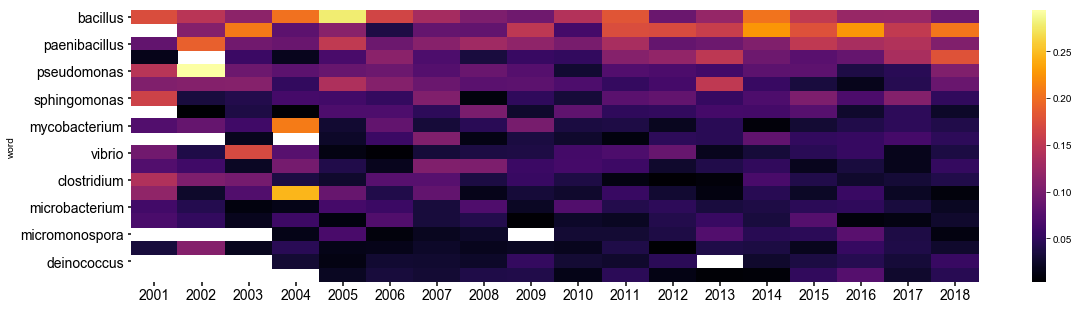

In [49]:
#optional for the paper
fig, ax = plt.subplots(figsize=(19,5))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(genus, cmap="inferno")

In [50]:
markers = transposed_relative[['gyrb', 'rpob', 'reca', 'atpd', 'rpoa', 'rpod', 'glnii', 'dnak', "recn"]].T

In [51]:
methods = transposed_relative[['rrna', 'phylogenetic', 'fatty', 'phenotypic', 'gc', 'dna-dna', 'lipids', 'chemotaxonomic', 'quinone', 'genomic', 'physiological', 'genotypic', 'biochemical', 'lipid', 'peptidoglycan', 'morphological', 'genome', 'gyrb', 'rpob', 'reca', 'atpd', 'rpoa', 'rpod', 'glnii', 'dnak', "recn", 'ani', 'anib', 'ggdc', 'dddh', 'gani']].T

# Figure 6 - Origin

In [52]:
country_env = transposed_relative[['soil', 'water', 'lake', 'human', 'plant', 'root','china', 'korea', 'japan', 'india', 'taiwan', 'usa', 'spain', 'russia', 'germany', 'france']].T


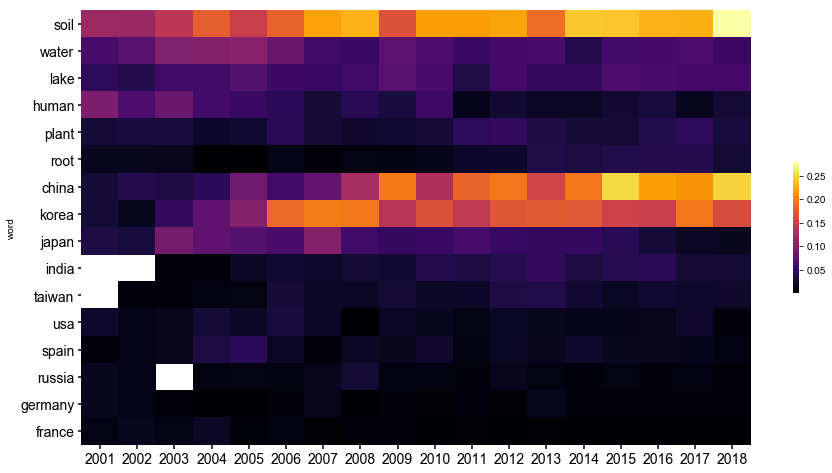

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(country_env, cmap="inferno", cbar_kws = {"shrink": 0.3})
fig.savefig("origin.svg")

# Figure 8 - Methods

In [54]:
methods = transposed_relative[["phylogenetic","phenotypic", "chemotaxonomic","genomic", "genotypic", "rrna", "gyrb", "rpob", "reca", "atpd", "rpoa", "rpod", "glnii", "dnak", "recn", "physiological", "biochemical", "morphological", "fatty", "lipids", "quinone", "peptidoglycan", "gc","dna-dna", "genome", "ani", "anib", "ggdc", "dddh", "gani"]].T

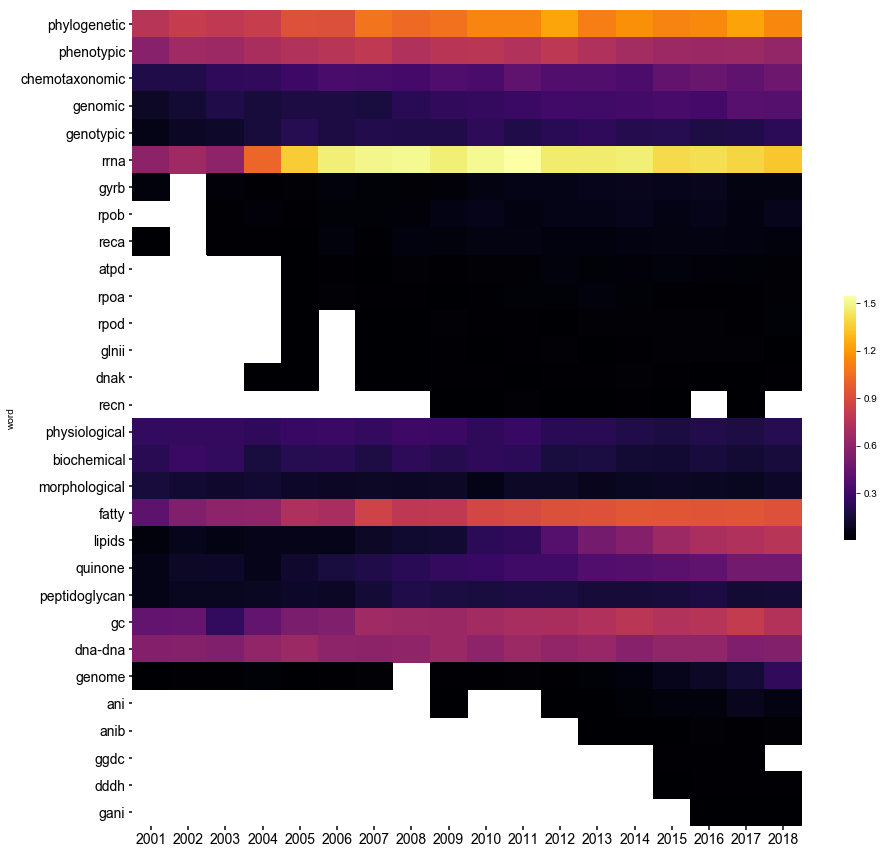

In [55]:
fig, ax = plt.subplots(figsize=(15,15))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(methods, cmap="inferno", cbar_kws = {"shrink": 0.3})
fig.savefig("tests.svg")

# Figure 7 - Phenotype

In [56]:
phenotype = transposed_relative[['aerobic', 'anaerobic', 'halophilic','thermophilic', "mesophilic", 'heterotrophic', "autotrophic", 'catalase-positive', 'catalase-negative', 'oxidase-positive', "oxidase-negative", 'rod-shaped', 'rods', 'rod', "cocci", "coccus", 'coccoid', 'mycelium','gram-negative', 'gram-stain-negative', 'gram-staining-negative', 'gram-positive', 'gram-stain-positive', 'non-motile', 'motile', 'non-spore-forming', 'endospore-forming', 'spore-forming']].T

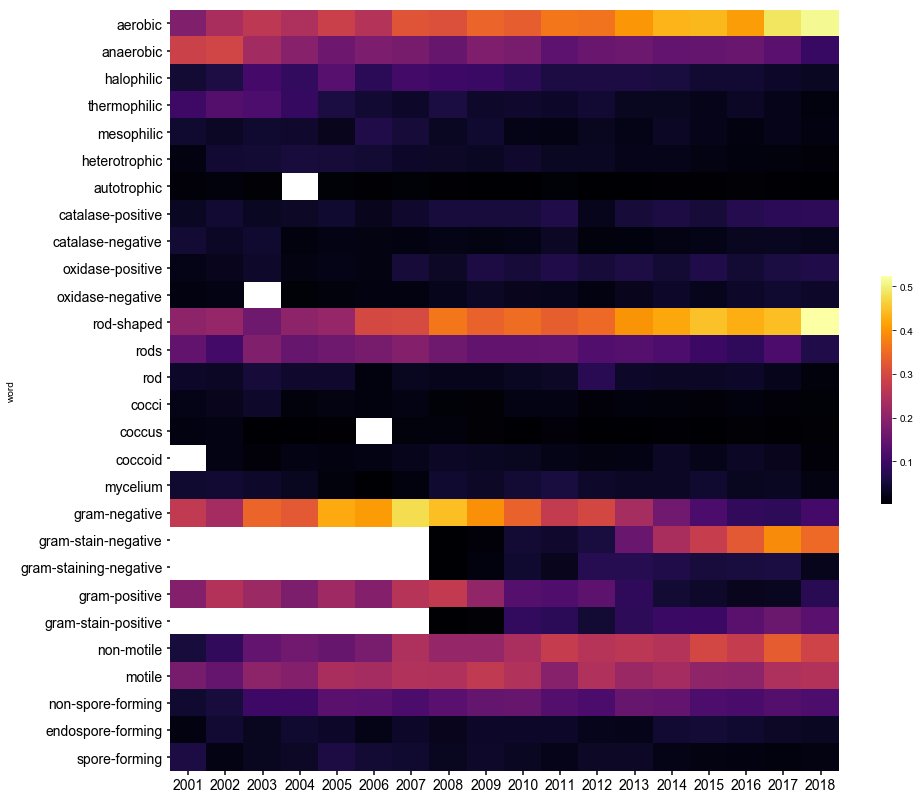

In [57]:
fig, ax = plt.subplots(figsize=(15,14))
ax.xaxis.set_tick_params(width=1.5, labelsize=14)
ax.yaxis.set_tick_params(width=1.5, labelsize=14)
#pal = sns.color_palette("Set1")
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
sns.heatmap(phenotype, cmap="inferno", cbar_kws = {"shrink": 0.3})
fig.savefig("characterization.svg")